<a href="https://colab.research.google.com/github/rikachan19/-Muhammad-Rifki-Raihan-TugasMachineLearning/blob/main/KhumairahAwaliyahErnas_TM9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import missingno as msno

warnings.filterwarnings('ignore')

In [121]:
import pandas as pd

# Membaca file Excel
data = pd.read_excel("/content/drive/MyDrive/(KhumairahAwaliyahErnas)TM9/z.xlsx")

In [123]:
data.head()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,NaN,Putri,KMD,NaN,AC,NaN,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,NaN,Putri,KMD,WiFi,AC,NaN,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,NaN,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,NaN,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,NaN,Putri,KMD,WiFi,AC,NaN,Kasur


In [124]:
data.tail()

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
10995,Kost Va Tipe A1 Jagakarsa Jakarta Selatan,700000,NaN,Putra,NaN,WiFi,NaN,KD,Kasur
10996,Kost Pondok Katama Tipe B Beji Depok,900000,NaN,Putra,NaN,WiFi,NaN,NaN,Kasur
10997,Kost Wisma Violet Beji Depok,800000,NaN,Putri,KMD,WiFi,NaN,NaN,NaN
10998,Kost Eksklusif Mara Juara Tipe Large Bedroom B...,2499000,NaN,Campur,KMD,WiFi,AC,KD,Kasur
10999,Kost Giyan Exclusive Tipe Reguler Beji Depok,1100000,NaN,Campur,KMD,NaN,AC,KD,NaN


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nama               11000 non-null  object 
 1   harga              11000 non-null  int64  
 2   rating             2786 non-null   float64
 3   jenis              11000 non-null  object 
 4   Kamar Mandi Dalam  9976 non-null   object 
 5   Wifi               8118 non-null   object 
 6   AC                 5816 non-null   object 
 7   Kloset Duduk       7182 non-null   object 
 8   Kasur              10702 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 773.6+ KB


In [126]:
data.shape

(11000, 9)

In [127]:
# mencari data kosong
data.isnull().sum()

nama                    0
harga                   0
rating               8214
jenis                   0
Kamar Mandi Dalam    1024
Wifi                 2882
AC                   5184
Kloset Duduk         3818
Kasur                 298
dtype: int64

In [128]:
## mengisi nilai kosong dengan "0" pada data
data.fillna('0',axis=0,inplace=True)

In [129]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
rating               object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [130]:
import missingno as msno
import matplotlib.pyplot as plt

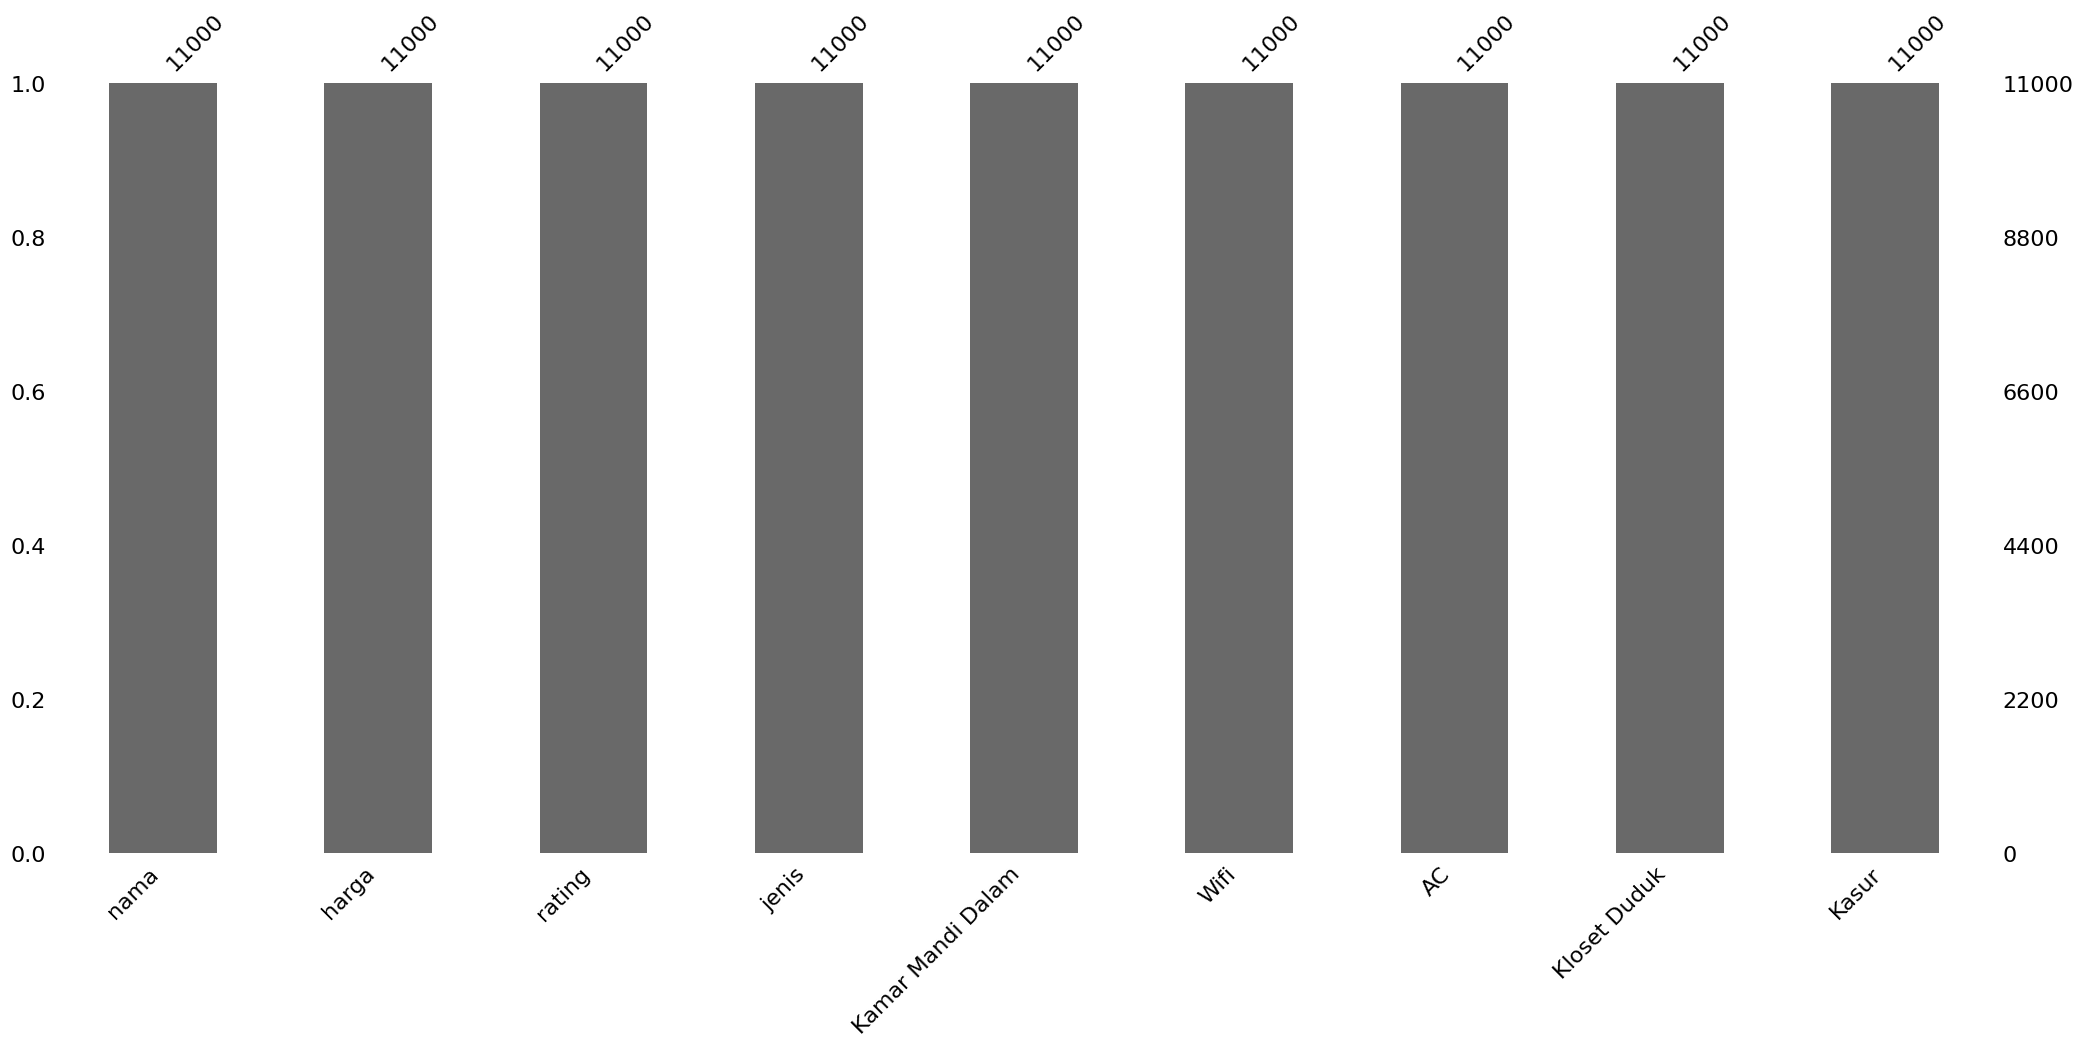

In [131]:
msno.bar(data)
plt.show()

In [132]:
# mencari data kosong
data.isnull().sum()

nama                 0
harga                0
rating               0
jenis                0
Kamar Mandi Dalam    0
Wifi                 0
AC                   0
Kloset Duduk         0
Kasur                0
dtype: int64

In [133]:
data.head(10)

,nama,harga,rating,jenis,Kamar Mandi Dalam,Wifi,AC,Kloset Duduk,Kasur
0,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,0,Putri,KMD,0,AC,0,Kasur
1,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,0,Putri,KMD,WiFi,AC,0,Kasur
2,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,0,Putri,KMD,WiFi,AC,KD,Kasur
3,Kost Apik Duta Residence Tipe A Sukmajaya Depok,1548000,0,Campur,KMD,WiFi,AC,KD,Kasur
4,Kost Apik UI Puspita Tipe B Kukusan Beji Depok,1233000,0,Putri,KMD,WiFi,AC,0,Kasur
5,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50.0,Campur,KMD,WiFi,0,0,Kasur
6,Kost Apik Griya Osfa UI Tipe A Beji Depok,1368000,0,Putri,KMD,WiFi,AC,0,Kasur
7,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47.0,Putri,KMD,WiFi,0,0,Kasur
8,Kost Singgahsini Alhidayah EMH-4 Tipe B Beji ...,1249500,0,Putri,KMD,WiFi,AC,0,Kasur
9,Kost Apik The Cozy Dorms Kukusan Beji Depok,1278000,0,Campur,KMD,0,AC,0,Kasur


# Data Cleaning

In [134]:
# menampilkan tipe data
data.dtypes

nama                 object
harga                 int64
rating               object
jenis                object
Kamar Mandi Dalam    object
Wifi                 object
AC                   object
Kloset Duduk         object
Kasur                object
dtype: object

In [135]:
data.columns

Index(['nama', 'harga', 'rating', 'jenis', 'Kamar Mandi Dalam', 'Wifi', 'AC',
       'Kloset Duduk', 'Kasur'],
      dtype='object')

In [136]:
# mengubah nama kolom pada Dataset ke dalam bahasa Indonesia
data=data.rename(columns = {"Kamar Mandi Dalam": "Kamar_Mandi_Dalam", "Kloset Duduk": "Kloset_Duduk"})

In [137]:
data = data[data.duplicated()]
print(data.shape)

(9089, 9)


In [138]:
data.drop_duplicates()

,nama,harga,rating,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,Kost Apik Aisyah Kukusan Tipe A Beji Depok,1143000,0,Putri,KMD,0,AC,0,Kasur
21,Kost Apik UI Puspita Tipe A Kukusan Beji Depok,1323000,0,Putri,KMD,WiFi,AC,0,Kasur
22,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,0,Putri,KMD,WiFi,AC,KD,Kasur
25,Kost Apik Duta Residence Tipe B Sukmajaya Depok,1008000,50.0,Campur,KMD,WiFi,0,0,Kasur
27,Kost Apik Wisma Okki Tipe B Beji Depok,1008000,47.0,Putri,KMD,WiFi,0,0,Kasur
...,...,...,...,...,...,...,...,...,...
10930,Kost Samitra Tipe A Cimanggis Depok,1350000,0,Putra,KMD,WiFi,AC,0,Kasur
10932,Kost Rumah Samara Kelapa Dua Depok,1350000,50.0,Putra,KMD,WiFi,0,KD,Kasur
10955,Kost Kosisti Pondok Cina Beji Depok,700000,44.0,Putri,KMD,WiFi,0,0,Kasur
10967,Kost Singgahsini Alhidayah EMH-4 Tipe A Beji ...,1683000,50.0,Putri,KMD,WiFi,AC,KD,Kasur


In [139]:
data.shape

(9089, 9)

In [140]:
## menghapus kolom nama karena tidak dibutuhkan dalam pembuatan model.
data.drop('nama',axis=1,inplace=True)

In [142]:
## menghapus kolom rating karena tidak dibutuhkan dalam pembuatan model.
data.drop('rating',axis=1,inplace=True)

In [143]:
data.head()

,harga,jenis,Kamar_Mandi_Dalam,Wifi,AC,Kloset_Duduk,Kasur
20,1143000,Putri,KMD,0,AC,0,Kasur
21,1323000,Putri,KMD,WiFi,AC,0,Kasur
22,1683000,Putri,KMD,WiFi,AC,KD,Kasur
25,1008000,Campur,KMD,WiFi,0,0,Kasur
27,1008000,Putri,KMD,WiFi,0,0,Kasur


In [144]:
data.jenis.value_counts()

jenis
Putri     4425
Campur    2797
Putra     1867
Name: count, dtype: int64

In [145]:
data.Kamar_Mandi_Dalam.value_counts()

Kamar_Mandi_Dalam
KMD    8278
0       811
Name: count, dtype: int64

In [146]:
data.Wifi.value_counts()

Wifi
WiFi    6813
0       2276
Name: count, dtype: int64

In [147]:
data.AC.value_counts()

AC
AC    4952
0     4137
Name: count, dtype: int64

In [148]:
data.Kloset_Duduk.value_counts()

Kloset_Duduk
KD    6124
0     2965
Name: count, dtype: int64

In [149]:
data.Kasur.value_counts()

Kasur
Kasur    8851
0         238
Name: count, dtype: int64

In [150]:
#identifikasi Atribut
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9089 entries, 20 to 10999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   harga              9089 non-null   int64 
 1   jenis              9089 non-null   object
 2   Kamar_Mandi_Dalam  9089 non-null   object
 3   Wifi               9089 non-null   object
 4   AC                 9089 non-null   object
 5   Kloset_Duduk       9089 non-null   object
 6   Kasur              9089 non-null   object
dtypes: int64(1), object(6)
memory usage: 568.1+ KB


In [151]:
from pandas import DataFrame

In [152]:
def preprocess_data(
    df: DataFrame,
    one_hot_cols: [str],
    standardized_cols: [str],
    scaler: StandardScaler,

):
  result_df = df.copy()
  result_df = encode_multivalued_attributes_with_one_hot_encoding(result_df, one_hot_cols)
  result_df, _ = standardize_attributes(result_df, standardized_cols, scaler)
  return result_df


In [153]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
one_hot_cols = (list(set(object_cols)))

In [154]:
object_cols = list(s[s].index)
object_cols

['jenis', 'Kamar_Mandi_Dalam', 'Wifi', 'AC', 'Kloset_Duduk', 'Kasur']

In [155]:
#one_hot_encoding kategori
def encode_multivalued_attributes_with_one_hot_encoding(
    df: DataFrame, col_names: [str]
):
  result_df = df.copy()
  for col_name in col_names:
    one_hot_values_df = pd.get_dummies(result_df[col_name], prefix=col_name, drop_first=True)
    result_df = pd.concat([result_df, one_hot_values_df], axis=1)
    result_df = result_df.drop(col_name, axis=1)

  return result_df


In [156]:
one_hot_cols

['Kloset_Duduk', 'Kasur', 'Kamar_Mandi_Dalam', 'Wifi', 'jenis', 'AC']

In [157]:
data_preProcess=encode_multivalued_attributes_with_one_hot_encoding(data, one_hot_cols)

In [158]:
data_preProcess.head(5)

,harga,Kloset_Duduk_KD,Kasur_Kasur,Kamar_Mandi_Dalam_KMD,Wifi_WiFi,jenis_Putra,jenis_Putri,AC_AC
20,1143000,False,True,True,False,False,True,True
21,1323000,False,True,True,True,False,True,True
22,1683000,True,True,True,True,False,True,True
25,1008000,False,True,True,True,False,False,False
27,1008000,False,True,True,True,False,True,False


In [159]:
data_preProcess.tail(5)

,harga,Kloset_Duduk_KD,Kasur_Kasur,Kamar_Mandi_Dalam_KMD,Wifi_WiFi,jenis_Putra,jenis_Putri,AC_AC
10995,700000,True,True,False,True,True,False,False
10996,900000,False,True,False,True,True,False,False
10997,800000,False,False,True,True,False,True,False
10998,2499000,True,True,True,True,False,False,True
10999,1100000,True,False,True,False,False,False,True


In [160]:
data.harga.describe()

count    9.089000e+03
mean     1.271204e+06
std      5.163714e+05
min      3.500000e+05
25%      8.500000e+05
50%      1.233000e+06
75%      1.548000e+06
max      3.035000e+06
Name: harga, dtype: float64

In [161]:
# normalisasi data numerik
def standardize_attributes(df: DataFrame, col_names: [str], scaler: StandardScaler = None):
  result_df = df.copy()

  if not scaler:
    scaler = StandardScaler()
    scaler.fit(result_df[col_names])

  result_df[col_names] = scaler.transform(result_df[col_names])

  return result_df, scaler

In [162]:
numeric_cols=(list(set(data) - set(object_cols)))

In [163]:
numeric_cols

['harga']

In [164]:
standardized_cols = numeric_cols

In [165]:
standardized_cols

['harga']

In [166]:
data_preProcess=standardize_attributes(data_preProcess, standardized_cols)

In [167]:
data_preProcess

(          harga  Kloset_Duduk_KD  Kasur_Kasur  Kamar_Mandi_Dalam_KMD  \
 20    -0.248292            False         True                   True   
 21     0.100314            False         True                   True   
 22     0.797525             True         True                   True   
 25    -0.509746            False         True                   True   
 27    -0.509746            False         True                   True   
 ...         ...              ...          ...                    ...   
 10995 -1.106248             True         True                  False   
 10996 -0.718909            False         True                  False   
 10997 -0.912579            False        False                   True   
 10998  2.377870             True         True                   True   
 10999 -0.331570             True        False                   True   
 
        Wifi_WiFi  jenis_Putra  jenis_Putri  AC_AC  
 20         False        False         True   True  
 21          Tru

In [168]:
prep_data, new_scaler = standardize_attributes(data, standardized_cols)
new_scaler

StandardScaler()

In [169]:
prep_data = preprocess_data(data, one_hot_cols, standardized_cols, new_scaler)   # Hasil Preprocessing: prep_data
prep_data.shape

(9089, 8)

In [170]:
prep_data.head()

,harga,Kloset_Duduk_KD,Kasur_Kasur,Kamar_Mandi_Dalam_KMD,Wifi_WiFi,jenis_Putra,jenis_Putri,AC_AC
20,-0.248292,False,True,True,False,False,True,True
21,0.100314,False,True,True,True,False,True,True
22,0.797525,True,True,True,True,False,True,True
25,-0.509746,False,True,True,True,False,False,False
27,-0.509746,False,True,True,True,False,True,False


In [171]:
prep_data.describe()

,harga
count,9.089000e+03
mean,1.430623e-16
std,1.000055e+00
min,-1.784093e+00
25%,-8.157439e-01
50%,-7.398883e-02
75%,5.360708e-01
max,3.415940e+00


[]

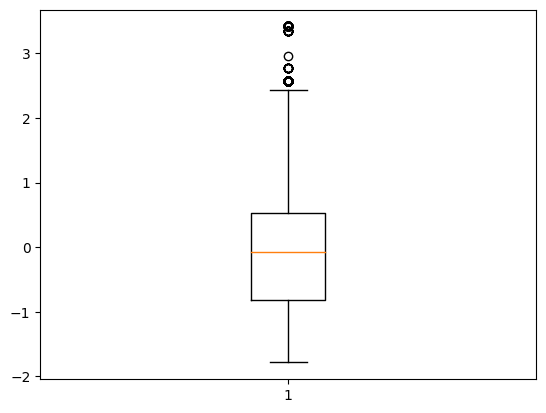

In [172]:
#boxplot with mathplotlib, melihat outlier yang dapat terjadi
plt.boxplot(prep_data.harga)
plt.plot()

In [176]:
import pandas as pd

# Misalnya, kita memiliki DataFrame prep_data yang sudah diisi dengan data
# Berikut adalah contoh bagaimana menghitung nilai IQR dan menggunakannya untuk masking

# Menghitung nilai Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = prep_data[['harga']].quantile(0.25)
Q3 = prep_data[['harga']].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung nilai maksimum dan minimum untuk outlier
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

# Masking data untuk menangani outliers
prep_data['harga'] = prep_data['harga'].mask(prep_data['harga'] > maximum['harga'], maximum['harga'])
prep_data['harga'] = prep_data['harga'].mask(prep_data['harga'] < minimum['harga'], minimum['harga'])

print('\nPersebaran data setelah ditangani Outlier: ')
print(prep_data[['harga']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
harga    2.563793
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
harga   -2.843466
dtype: float64

Persebaran data setelah ditangani Outlier: 
             harga
count  9089.000000
mean     -0.010220
std       0.969182
min      -1.784093
25%      -0.815744
50%      -0.073989
75%       0.536071
max       2.563793


In [177]:
prep_data.shape

(9089, 8)

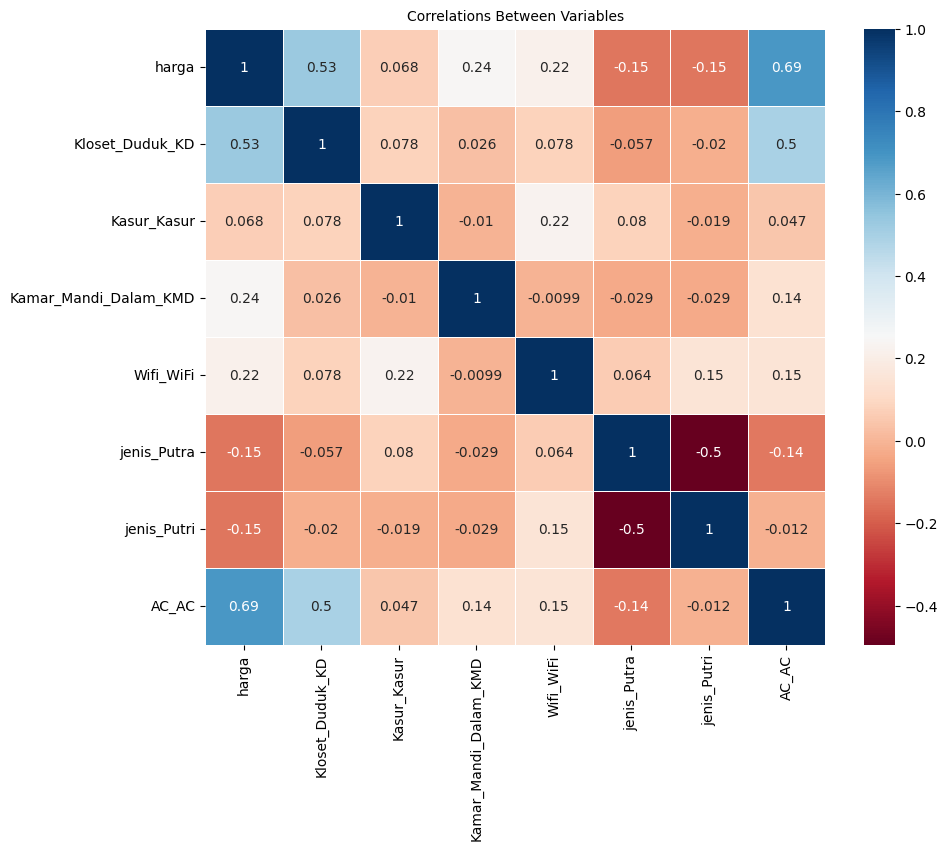

In [178]:
plt.figure (figsize=(10,8))
sns.heatmap(prep_data.corr(), annot=True, linewidth=.5, cmap= "RdBu")
plt.title("Correlations Between Variables", size=10)
plt.show()

In [179]:
numeric_cols = prep_data.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('The Most Correlated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[:10], '\n')
print ('The Most Uncorrelated Features with Harga:'), print (corr['harga'].sort_values(ascending = False)[-5:])

The Most Correlated Features with Harga:
harga    1.0
Name: harga, dtype: float64 

The Most Uncorrelated Features with Harga:
harga    1.0
Name: harga, dtype: float64


(None, None)

In [180]:
prep_data[['harga']].describe()

,harga
count,9089.000000
mean,-0.010220
std,0.969182
min,-1.784093
25%,-0.815744
50%,-0.073989
75%,0.536071
max,2.563793


In [181]:
#mengimplementasikan train/test
from sklearn.model_selection import train_test_split

In [182]:
X = prep_data.drop(['harga'], axis = 1)
y = prep_data['harga']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
# untuk mengatasi pengulangan proses hasil running yang berubah-ubah
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [185]:
print(X_train)

       Kloset_Duduk_KD  Kasur_Kasur  Kamar_Mandi_Dalam_KMD  Wifi_WiFi  \
10862            False         True                  False       True   
1042             False        False                   True      False   
6927              True         True                   True       True   
9695             False         True                   True       True   
7574              True         True                   True       True   
...                ...          ...                    ...        ...   
3297             False         True                   True       True   
10874             True         True                   True       True   
7799              True         True                   True       True   
2084              True         True                   True       True   
7307             False         True                   True       True   

       jenis_Putra  jenis_Putri  AC_AC  
10862        False        False   True  
1042         False         True  False  


In [186]:
print(X_test)

      Kloset_Duduk_KD  Kasur_Kasur  Kamar_Mandi_Dalam_KMD  Wifi_WiFi  \
2679             True         True                   True      False   
4623             True         True                   True       True   
2180             True         True                   True      False   
9865            False         True                   True       True   
9507             True         True                  False       True   
...               ...          ...                    ...        ...   
8215             True         True                   True       True   
7709             True         True                   True       True   
9415            False        False                   True      False   
4128            False         True                   True      False   
1882             True         True                   True       True   

      jenis_Putra  jenis_Putri  AC_AC  
2679        False        False   True  
4623        False         True   True  
2180        Fal

In [187]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [188]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [189]:
from sklearn.model_selection import cross_val_score

In [195]:
from sklearn.tree import DecisionTreeRegressor

In [196]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [197]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg],
    index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,0.400611
MSE_tree_reg,0.292727
RMSE_tree_reg,0.541043


In [198]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.82289144 0.82348561 0.80689687 0.83132465 0.81310803]


In [199]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.6887819191552271